In [52]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [53]:
%ls ..

config.toml              exchange_data.sqlite  kairon_exercise/  README.md
data_analysis/           flake.lock            poetry.lock       tests/
exchange_data_10.sqlite  flake.nix             pyproject.toml


In [54]:
conn = sqlite3.connect("../exchange_data.sqlite")
    
try:
    df = pd.read_sql_query("SELECT * FROM calcdatamodel", conn)   
finally:
   # Close the database connection
   conn.close()

In [55]:
print(df)

       db_id exchange    market    spread  slippage  volume  \
0          1   kucoin  BTC/USDT  0.000243 -0.008029       4   
1          2   kucoin  ETH/USDT  0.000462 -0.007398       2   
2          3   kucoin  XRP/USDT  0.008372       NaN       0   
3          4   kucoin  LTC/USDT  0.002868       NaN       0   
4          5   kucoin  ADA/USDT  0.007308  0.046006       1   
...      ...      ...       ...       ...       ...     ...   
13635  13636  binance  TRX/USDT  0.010151  0.058877      98   
13636  13637  binance  MKR/USDT  0.079239  0.000000       1   
13637  13638  binance  XTZ/USDT  0.118064  0.107458      11   
13638  13639  binance  FIL/USDT  0.020109 -0.080345      33   
13639  13640  binance  SOL/USDT  0.014702 -0.011355      88   

                        timestamp  
0      2023-12-18 10:54:41.811848  
1      2023-12-18 10:54:41.811848  
2      2023-12-18 10:54:41.811848  
3      2023-12-18 10:54:41.811848  
4      2023-12-18 10:54:41.811848  
...                        

In [56]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [57]:
print(df)

       db_id exchange    market    spread  slippage  volume  \
0          1   kucoin  BTC/USDT  0.000243 -0.008029       4   
1          2   kucoin  ETH/USDT  0.000462 -0.007398       2   
2          3   kucoin  XRP/USDT  0.008372       NaN       0   
3          4   kucoin  LTC/USDT  0.002868       NaN       0   
4          5   kucoin  ADA/USDT  0.007308  0.046006       1   
...      ...      ...       ...       ...       ...     ...   
13635  13636  binance  TRX/USDT  0.010151  0.058877      98   
13636  13637  binance  MKR/USDT  0.079239  0.000000       1   
13637  13638  binance  XTZ/USDT  0.118064  0.107458      11   
13638  13639  binance  FIL/USDT  0.020109 -0.080345      33   
13639  13640  binance  SOL/USDT  0.014702 -0.011355      88   

                       timestamp  
0     2023-12-18 10:54:41.811848  
1     2023-12-18 10:54:41.811848  
2     2023-12-18 10:54:41.811848  
3     2023-12-18 10:54:41.811848  
4     2023-12-18 10:54:41.811848  
...                          ... 

In [58]:
# print(df[(df["market"] == "LTC/USDT") & (df["exchange"] == "kucoin")].to_string())

In [59]:
# Get unique markets and exchanges
markets = df['market'].unique()
exchanges = df['exchange'].unique()

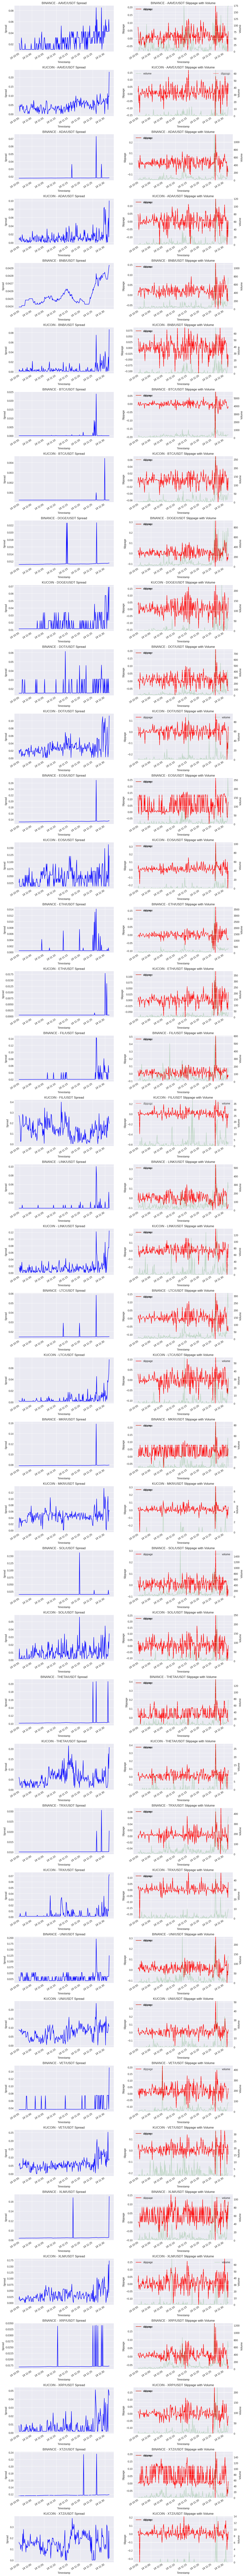

In [60]:
# Define a palette for the plots
palette = {
    'spread': 'deepskyblue',
    'slippage': 'crimson',
    'volume': 'lightgreen'
}

# Modernizing the plot with a more contemporary theme and colors
plt.style.use('seaborn-v0_8-darkgrid') # using a seaborn style for modern look

# Interpolate NaN values in 'slippage'
df['slippage'] = df['slippage'].interpolate()

# Plotting with adjustments
fig, axes = plt.subplots(len(grouped_data), 2, figsize=(15, 5 * len(grouped_data)))
plt.subplots_adjust(hspace=0.4)

for ((market, exchange), group_data), row_axes in zip(grouped_data, axes):
    # Plot for Spread
    ax1 = row_axes[0]
    group_data.plot(x='timestamp', y='spread', ax=ax1, color=palette['spread'], legend=False)
    ax1.set_title(f'{exchange.upper()} - {market} Spread')
    ax1.set_xlabel('Timestamp')
    ax1.set_ylabel('Spread')
    ax1.grid(True)

    # Plot for Slippage with Volume as bar chart
    ax2 = row_axes[1]
    group_data.plot(x='timestamp', y='slippage', ax=ax2, color=palette['slippage'], legend=False)
    ax2.set_title(f'{exchange.upper()} - {market} Slippage with Volume')
    ax2.set_xlabel('Timestamp')
    ax2.set_ylabel('Slippage', color=palette['slippage'])
    ax2.grid(True)

    # Adjust the scale for slippage to make it more readable
    ax2.set_ylim(group_data['slippage'].min(), group_data['slippage'].max())

    # Add volume
    ax2b = ax2.twinx()
    group_data.plot(x='timestamp', y='volume', ax=ax2b, color=palette['volume'], alpha=0.2, legend=False)
    # volume_bars = ax2b.bar(group_data['timestamp'], group_data['volume'], width=0.02, alpha=0.3, color='green')
    ax2b.set_ylabel('Volume', color=palette['volume'])

    # Adjust the scale for volume to make it more readable
    ax2b.set_ylim(0, group_data['volume'].max())

plt.show()

In [10]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']